# Checkpoint 3

Implement here your algorithm to estimate the parametric field from timings recorded in the 20 electrodes of the mapping catheter.

The algorithm should output the following information:
- your estimates of parametric field


In [7]:
# imports

import numpy as np
import matplotlib.pyplot as plt


In [8]:
CP3data = np.load("CP3data.npz")
CP3data = CP3data['arr_0']

In [9]:
CP3estimate = np.load("CP3field.npz")
CP3estimate = CP3estimate['arr_0']

## Autoencoder for compressed representation

In [10]:
seed = 182374

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
#tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

2024-06-28 14:13:08.475809: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 14:13:08.478421: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 14:13:08.532736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 14:13:09.380070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


In [12]:
# def build_autoencoder(input_shape):

#     #num_classes = 1

#     inputs = tf.keras.layers.Input(shape=input_shape, name='Input')

#     #Contraction path
#     c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
#     #c1 = tf.keras.layers.Dropout(0.1)(c1)
#     #c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
#     #b1 = tf.keras.layers.BatchNormalization()(c1)
#     #r1 = tf.keras.layers.ReLU()(b1)
#     p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

#     c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
#     #c2 = tf.keras.layers.Dropout(0.1)(c2)
#     #c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
#     # b2 = tf.keras.layers.BatchNormalization()(c2)
#     # r2 = tf.keras.layers.ReLU()(b2)
#     p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

#     c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
#     #c3 = tf.keras.layers.Dropout(0.2)(c3)
#     #c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
#     # b3 = tf.keras.layers.BatchNormalization()(c3)
#     # r3 = tf.keras.layers.ReLU()(b3)
#     p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

#     c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
#     #c4 = tf.keras.layers.Dropout(0.2)(c4)
#     #c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
#     # b4 = tf.keras.layers.BatchNormalization()(c4)
#     # r4 = tf.keras.layers.ReLU()(b4)
#     c4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

#     c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
#     # b5 = tf.keras.layers.BatchNormalization()(c5)
#     # r5 = tf.keras.layers.ReLU()(b5)
#     #c5 = tf.keras.layers.Dropout(0.3)(c5)
#     #c5 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#     shape_preflattened = c5.shape[1:]

#     x = tf.keras.layers.Flatten()(c5)

#     x = tf.keras.layers.Dense(128, activation='relu')(x)
#     #x = tf.keras.layers.Dropout(0.2)(x)

#     x = tf.keras.layers.Dense(64, activation='relu')(x)
#     #x = tf.keras.layers.Dropout(0.2)(x)

#     x = tf.keras.layers.Dense(32, activation='relu')(x)

#     encoder = tf.keras.layers.Dense(5, activation='relu')(x)

#     #Expansive path

#     x = tf.keras.layers.Dense(32, activation='relu')(encoder)
#     #x = tf.keras.layers.Dropout(0.2)(x)

#     x = tf.keras.layers.Dense(64, activation='relu')(x)
#     #x = tf.keras.layers.Dropout(0.2)(x)

#     x = tf.keras.layers.Dense(128, activation='relu')(x)
#     #x = tf.keras.layers.Dropout(0.2)(x)

#     size = shape_preflattened[0]*shape_preflattened[1]*shape_preflattened[2]

#     x = tf.keras.layers.Dense(size, activation='relu')(x)
#     x = tf.keras.layers.Reshape(target_shape = shape_preflattened)(x)
#     #x = tf.keras.layers.Dropout(0.3)(x)

#     u7 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='valid')(x)
#     u7 = tf.keras.layers.ReLU()(u7)
#     #u7 = tf.keras.layers.Dropout(0.3)(u7)


#     u8 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(u7)
#     u8 = tf.keras.layers.ReLU()(u8)
#     #u8 = tf.keras.layers.Dropout(0.3)(u8)

#     u9 = tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same')(u8)
#     u9 = tf.keras.layers.ReLU()(u9)
#     #u9 = tf.keras.layers.Dropout(0.3)(u9)

#     u10 = tf.keras.layers.Conv2DTranspose(8, (3, 3), strides=(2, 2), padding='same')(u9)
#     u10 = tf.keras.layers.ReLU()(u10)

#     decoder = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(u10)

#     model = tfk.Model(inputs,decoder)

#     return model



# input_shape = (152,152,1)
# output_shape = ()



# autoencoder = build_autoencoder(input_shape)#,output_shape,optimizer)
# autoencoder.summary()

In [13]:
from sklearn.model_selection import train_test_split

n = 100

speed_fields = CP3estimate[:,0]

max_sf = np.max(speed_fields)
min_sf = np.min(speed_fields)
speed_fields = (speed_fields-min_sf)/(max_sf-min_sf)

# speed_fields_pad = np.zeros((n,152,152,1))
# padding = tf.constant([[0, 1], [0, 1]])

# for i in range(n):
#     speed_fields_pad[i] = tf.reshape(tf.pad(tf.constant(speed_fields[i]),padding,mode='SYMMETRIC'),shape = (152,152,1))

# X_train, X_test = train_test_split(speed_fields_pad, test_size=0.05, random_state=485472)
X_train, X_test = train_test_split(speed_fields, test_size=0.05, random_state=485472)

In [14]:
idx = []
for i in range(len(X_test)):

    idx.append(np.where(speed_fields==X_test[i])[0][0])

print(idx)

[22, 48, 18, 92, 19]


In [15]:
def build_autoencoder(input_shape):

    inputs = tf.keras.layers.Input(shape=input_shape, name='Input')

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(512,activation = 'leaky_relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    #x = tf.keras.layers.Dense(256,activation = 'relu')(x)
    #x = tf.keras.layers.Dense(128,activation = 'leaky_relu')(x)
    #x = tf.keras.layers.Dropout(0.2)(x)
    #x = tf.keras.layers.Dense(128,activation = 'relu')(x)
    x = tf.keras.layers.Dense(8,activation = 'leaky_relu')(x)
    #x = tf.keras.layers.Dense(128,activation = 'relu')(x)
    #x = tf.keras.layers.Dense(128,activation = 'leaky_relu')(x)
    #x = tf.keras.layers.Dropout(0.2)(x)
    #x = tf.keras.layers.Dense(256,activation = 'relu')(x)
    x = tf.keras.layers.Dense(512,activation = 'leaky_relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    decoder = tf.keras.layers.Dense(151*151, activation = 'sigmoid')(x)

    output = tf.keras.layers.Reshape(input_shape)(decoder)

    model = tf.keras.Model(inputs,output)

    return model

autoencoder = build_autoencoder((151,151))
autoencoder.summary()

optimizer = tfk.optimizers.AdamW(learning_rate = 5e-4)

autoencoder.compile(optimizer=optimizer, loss='mse', metrics = ['mae'])

2024-06-28 14:13:10.820289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-28 14:13:10.820896: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 151, 151)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 22801)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,674,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22801)          │    11,696,913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 151, 151)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,380,249 (89.19 MB)

 Trainable params: 23,380,249 (89.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor = 0.7, patience = 200),tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 500, restore_best_weights=True)]

autoencoder.fit(X_train, X_train, validation_data=(X_test,X_test), batch_size=8, epochs=1000, callbacks=callbacks)

In [ ]:
# Prediction
idx = 48
speed_field = speed_fields[idx]
speed_field = tf.reshape(speed_field, shape = (1,151,151))
speed_field_pred = autoencoder.predict(speed_field)

# speed_field = speed_fields_pad[-1]
# speed_field_real = speed_field[:151,:151].reshape((151,151))
# print(speed_field_real.shape)

# speed_field = tf.reshape(speed_field, shape = (1,152,152,1))
# speed_field_pred = autoencoder.predict(speed_field).reshape((152,152))[:151,:151]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


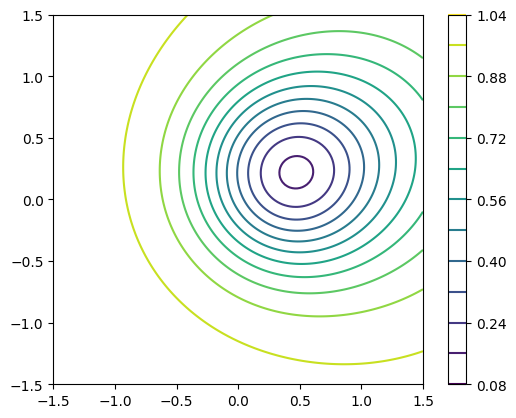

In [ ]:
X, Y = np.meshgrid(np.linspace(-1.5,1.5,151), np.linspace(-1.5,1.5,151))
speed_field = speed_fields[idx]
plt.contour(X, Y, speed_field , 10)
plt.gca().set_aspect(1)
plt.colorbar()

0.99845004


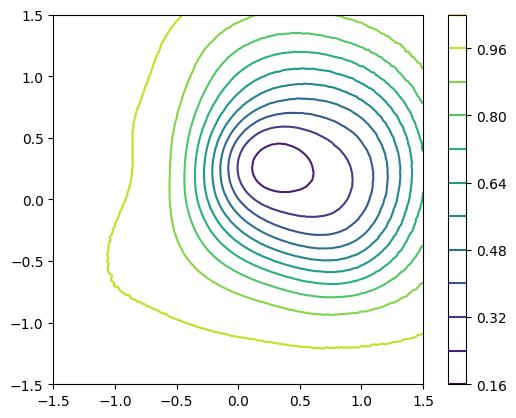

In [ ]:
X, Y = np.meshgrid(np.linspace(-1.5,1.5,151), np.linspace(-1.5,1.5,151))

plt.contour(X, Y, speed_field_pred[0],10)
plt.gca().set_aspect(1)
plt.colorbar()
print(np.max(speed_field_pred[0]))

In [ ]:
for i in autoencoder.layers:
    print(i)

<InputLayer name=Input, built=True>
<Flatten name=flatten_1, built=True>
<Dense name=dense_4, built=True>
<Dropout name=dropout_2, built=True>
<Dense name=dense_5, built=True>
<Dense name=dense_6, built=True>
<Dropout name=dropout_3, built=True>
<Dense name=dense_7, built=True>
<Reshape name=reshape_1, built=True>


In [ ]:
#

encoder = tfk.Model(autoencoder.input, autoencoder.layers[4].output)

decoder_input = tf.keras.Input(shape=encoder.layers[-1].output.shape[1:])
print(decoder_input)
decoder_output = decoder_input
for layer in autoencoder.layers[5:]:
    decoder_output = layer(decoder_output)

decoder = tfk.Model(inputs=decoder_input, outputs=decoder_output)

decoder.summary()

<KerasTensor shape=(None, 8), dtype=float32, sparse=None, name=keras_tensor_21>


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 22801)          │    11,696,913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 151, 151)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701,521 (44.64 MB)

 Trainable params: 11,701,521 (44.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tfk.models.save_model(encoder,'encoder_8ldim.keras')
tfk.models.save_model(decoder,'decoder_8ldim.keras')
tfk.models.save_model(autoencoder,'autoencoder_8ldim.keras')